In [1]:
install.packages('quantmod')
library(quantmod)

package 'quantmod' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\HP\AppData\Local\Temp\Rtmpas4FU4\downloaded_packages


Warning message:
"package 'quantmod' was built under R version 3.6.3"Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Loading required package: TTR
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


In [290]:
BTC3 <- getSymbols("XWD.TO",src="yahoo",auto.assign=FALSE)
BTC3 <- na.omit(BTC3)
BTC3 <- BTC3["2009-11-01/2020-01-10"]
head(BTC3)

           XWD.TO.Open XWD.TO.High XWD.TO.Low XWD.TO.Close XWD.TO.Volume
2009-11-02       22.21       22.21      22.04        22.15          4000
2009-11-03       21.92       22.05      21.92        21.94          7500
2009-11-04       22.12       22.29      22.12        22.12         12700
2009-11-05       22.12       22.12      22.12        22.12             0
2009-11-06       22.45       22.70      22.43        22.70          2800
2009-11-09       22.61       22.87      22.61        22.87          1600
           XWD.TO.Adjusted
2009-11-02        18.02447
2009-11-03        17.85358
2009-11-04        18.00006
2009-11-05        18.00006
2009-11-06        18.47203
2009-11-09        18.61037

In [291]:
tail(BTC3)

           XWD.TO.Open XWD.TO.High XWD.TO.Low XWD.TO.Close XWD.TO.Volume
2020-01-03       55.35       55.65      55.34        55.49         18700
2020-01-06       55.18       55.50      55.18        55.49         13700
2020-01-07       55.62       55.73      55.56        55.56          5000
2020-01-08       55.57       56.08      55.57        55.92         43800
2020-01-09       56.33       56.49      56.29        56.37          9400
2020-01-10       56.31       56.35      56.25        56.25          4300
           XWD.TO.Adjusted
2020-01-03        54.85761
2020-01-06        54.85761
2020-01-07        54.92681
2020-01-08        55.28271
2020-01-09        55.72758
2020-01-10        55.60895

In [292]:
BTC3 <- BTC3[ ,-c(2,3,4,5)]
head(BTC3)

           XWD.TO.Open XWD.TO.Adjusted
2009-11-02       22.21        18.02447
2009-11-03       21.92        17.85358
2009-11-04       22.12        18.00006
2009-11-05       22.12        18.00006
2009-11-06       22.45        18.47203
2009-11-09       22.61        18.61037

In [293]:
BTC3 <- BTC3[ ,-c(1)]
head(BTC3)

           XWD.TO.Adjusted
2009-11-02        18.02447
2009-11-03        17.85358
2009-11-04        18.00006
2009-11-05        18.00006
2009-11-06        18.47203
2009-11-09        18.61037

In [294]:
colnames(BTC3)[colnames(BTC3) == "XWD.TO.Adjusted"] <- "TR"

In [295]:
head(BTC3)

                 TR
2009-11-02 18.02447
2009-11-03 17.85358
2009-11-04 18.00006
2009-11-05 18.00006
2009-11-06 18.47203
2009-11-09 18.61037

In [296]:
logret <- diff(log(BTC3$TR))  # diff function gives us the return
head(logret,3)

                     TR
2009-11-02           NA
2009-11-03 -0.009525951
2009-11-04  0.008170986

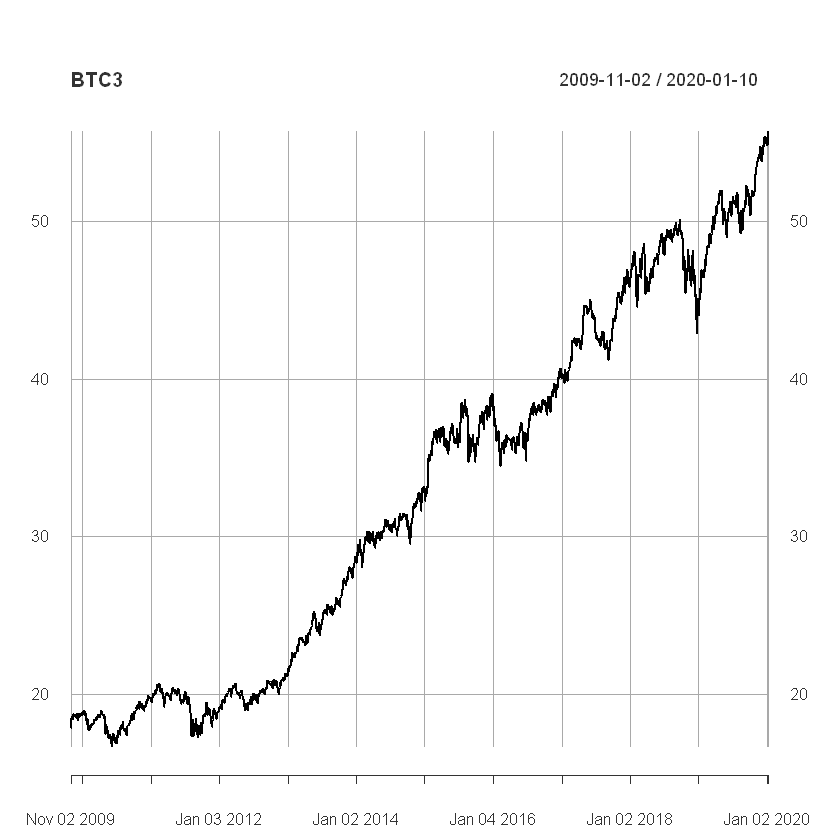

In [297]:
plot(BTC3)

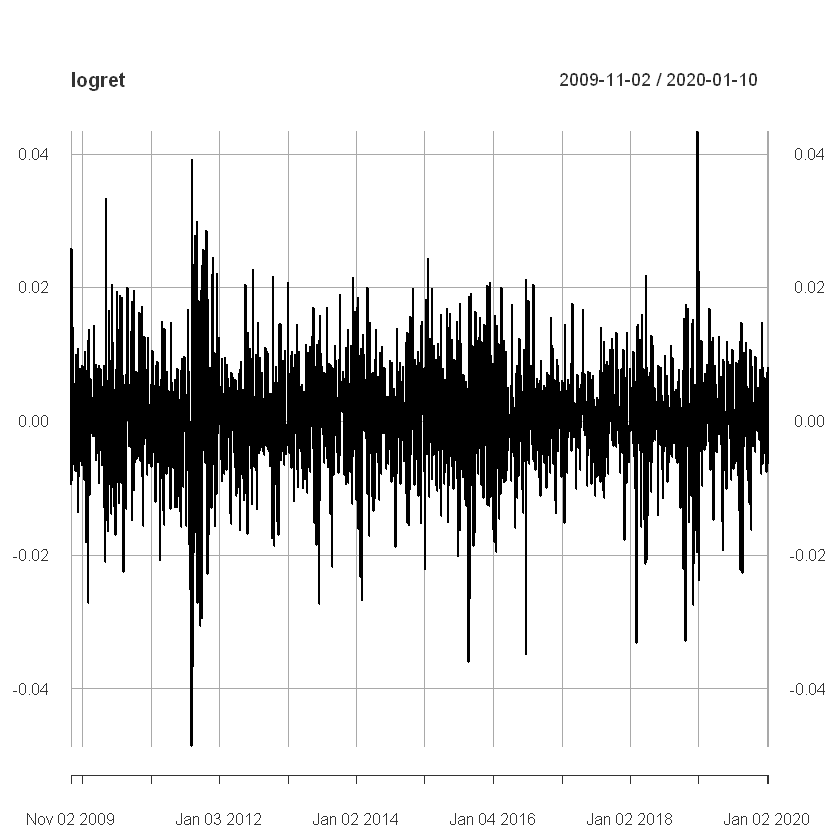

In [298]:
plot(logret)

In [299]:
# The R code to find log-return, removing missing First Observation

logret <- diff(log(BTC3$TR))[-1]
round(head(logret,3),6)   # round function to display 6 decimals

# First Value interpretation 
# Stock-index fell by 0.95%

                  TR
2009-11-03 -0.009526
2009-11-04  0.008171
2009-11-05  0.000000

In [300]:
# Now Calculate the discreet Return from the formula of exp.
ret <- exp(logret)-1  #To go from log return to simple return,
round(head(ret,3),6)

                  TR
2009-11-03 -0.009481
2009-11-04  0.008204
2009-11-05  0.000000

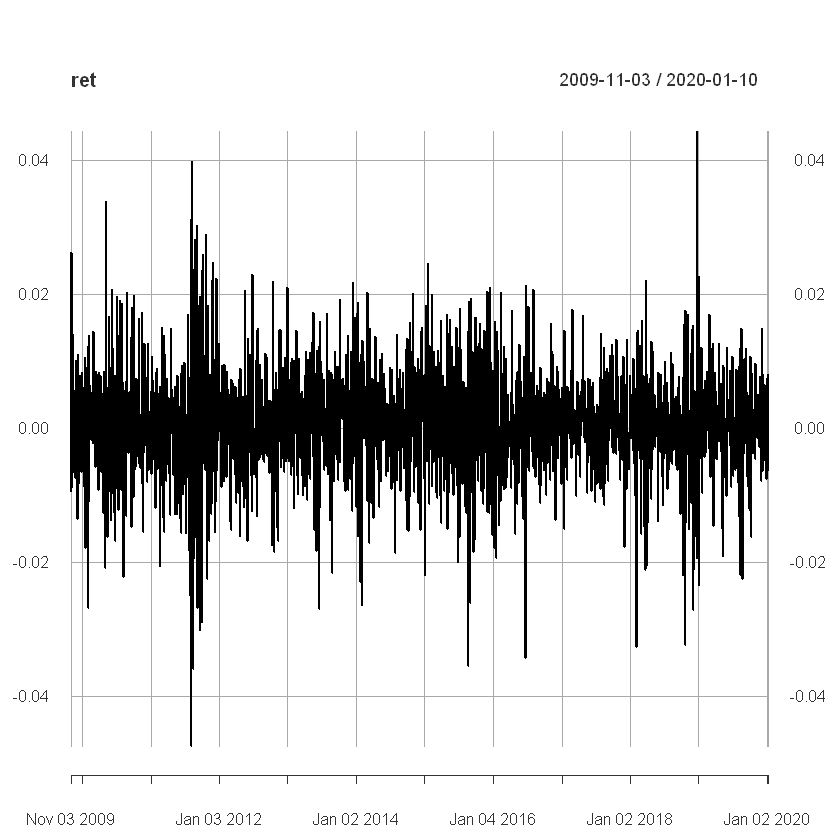

In [301]:
plot(ret)

In [302]:
# Weekly log-return

logret_w <- apply.weekly(BTC3,sum)

round(head(logret_w,3),6)

                 TR
2009-11-06 90.35021
2009-11-13 92.35201
2009-11-20 93.41801

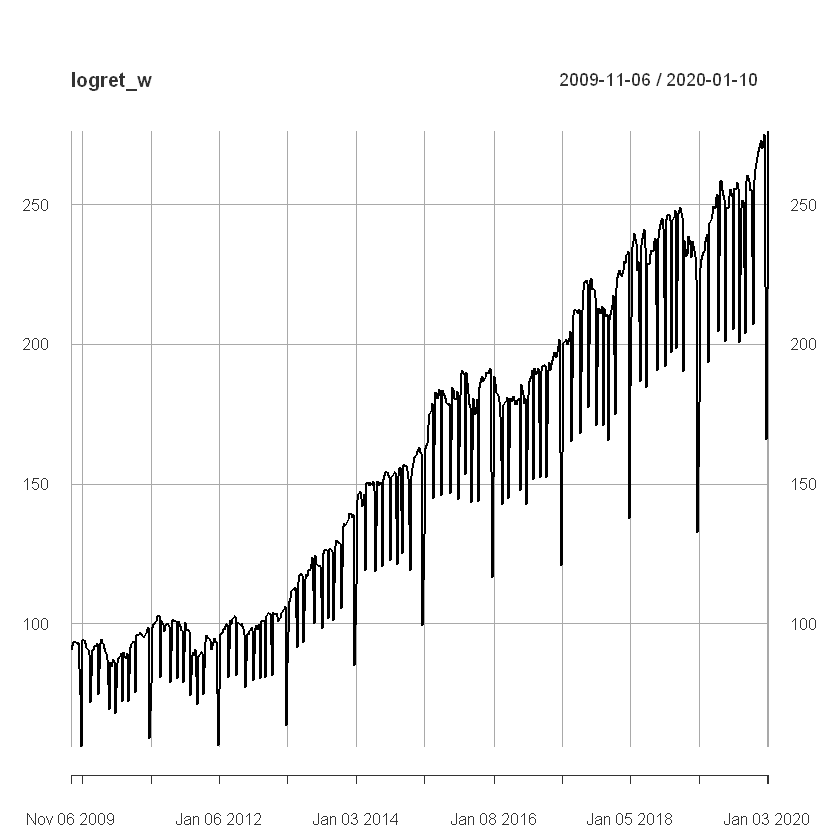

In [303]:
plot(logret_w)

In [304]:
# Calculate discrete return from log-return

ret_w <- exp(logret_w)-1

round(tail(ret_w,3),6)

                      TR
2019-12-27  1.288691e+72
2020-01-03  2.859501e+95
2020-01-10 1.097972e+120

In [305]:
#monthly
logret_w1 <- apply.monthly(BTC3,sum)

round(head(logret_w1,3),6)

                 TR
2009-11-30 387.8882
2009-12-31 391.6613
2010-01-29 372.8896

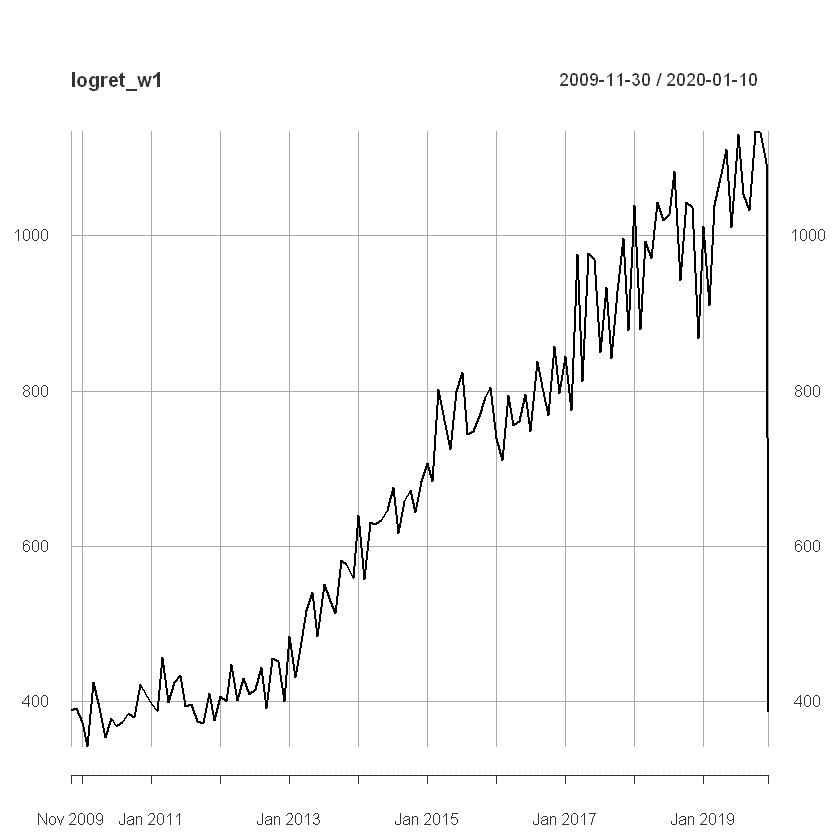

In [306]:
plot(logret_w1)

In [307]:
# Distribution of log-returns
# ESTIMATE U -using sample mean  and sigma using std. deviation

mu <- round(mean(logret),8)

sig <- round(sd(logret),8)

mu
sig

[1] 0.00044077

[1] 0.00792524

In [308]:
var <- round(qnorm(0.05,mu,sig),6) # quantile for the normal distribution  # VAR value is -1.5% 
var
# 0.05 denotes the quantile we want

[1] -0.012595

In [309]:
#If returns are normally calculated , then VAR and ES are easly calculated


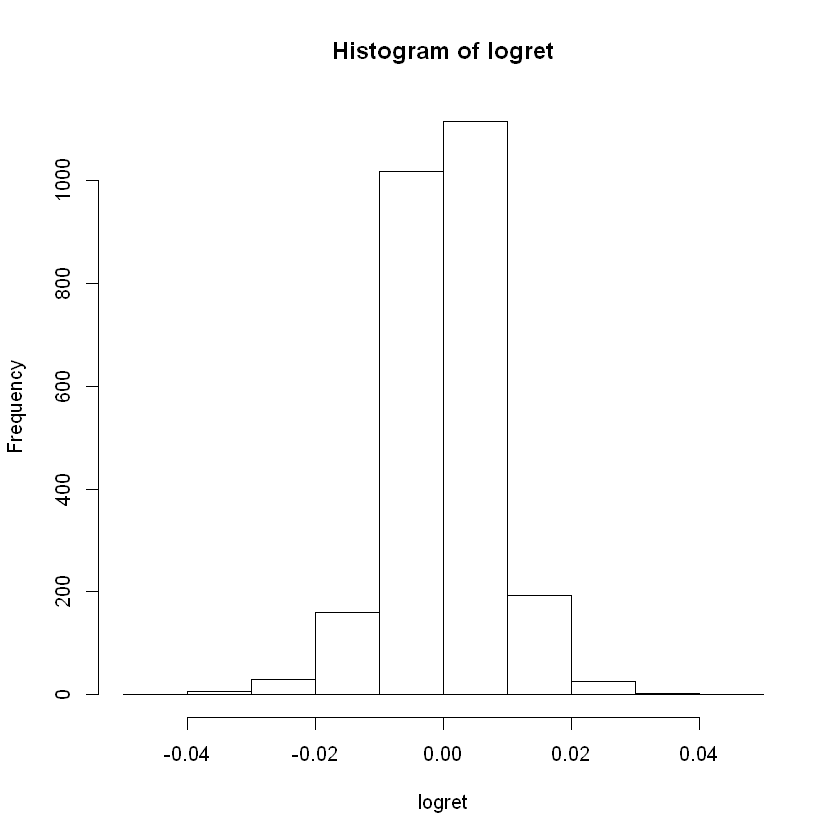

In [310]:
hist(logret)

In [311]:
(exp(var)-1) * 1000000

[1] -12516.01

In [312]:
(exp(var)-1) # First convert var into discrete returns

[1] -0.01251601

In [313]:
# ES - If the outcome were to be worse than -1.7% then the ES is the expected loss

In [314]:
# Calculating 1-day 95% Expected Shortfall for alpha = 0.05 during the case of normal distribution
es <- mu-sig*dnorm(qnorm(0.05,0,1),0,1)/0.05
es
# It means if the log-return is worse than -1.5% then the avg. loss is abt -1.9%

[1] -0.01590672

In [315]:
# If funds fall below 2.2% 
(exp(es)-1) # First convert var into discrete returns

[1] -0.01578088

In [316]:
(exp(es)-1) * 1000000  # es converted into discrete returns

[1] -15780.88

In [317]:
# Next wld be predicting AR & ES based on Simulations - Up untill now we consider the Normality Assumptions
# Week 3
#Non-Normal Distribution
#As skewness and Kurtosis has an effect on VAR & ES

In [318]:
install.packages('moments')
library(moments)

Warning message:
"package 'moments' is in use and will not be installed"

In [319]:
install.packages('MASS')
library(MASS)

Warning message:
"package 'MASS' is in use and will not be installed"

In [320]:
install.packages('metRology')
library(metRology)

Warning message:
"package 'metRology' is in use and will not be installed"

In [321]:
install.packages("rugarch")
library(rugarch)

Warning message:
"package 'rugarch' is in use and will not be installed"

In [322]:
# Draw 100,000 outcomes from the N(mu,sig) distribution
alpha <- 0.05
set.seed(123789)    #seed value tells the computer where to start the sequence # if i do not set , then each time i get diff.set

rvec <- rnorm(100000,mu,sig)# Get a 100000 rando no.s from a random distribution   # So the result wld be different everytime

VAR <- quantile(rvec,alpha)

ES <- mean(rvec[rvec<VAR])

round(VAR,6)

round(ES,6)
# Simulation method will not give us the exact correct value as it takes an assumption on the mean and std.-deviation

5% 
-0.012662

[1] -0.016064

In [323]:
#The objective of the class is - How to re-scale the t-distribution with U , STD. dev , Kurtosis , skewness, d.o.f.
#To match the original distribution of the data
#It provides accurate VAR & Es for our data

## Re-scaledt-distribution model
# We use M-L method
# Use the fit-distribution function


In [324]:
rvec <- as.vector(logret) #Using ML method and finding the best parameters
t.fit <- fitdistr(rvec,"t")
round(t.fit$estimate,6)

Warning message in dt((x - m)/s, df, log = TRUE):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in dt((x - m)/s, df, log = TRUE):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"Warning message in log(s):
"NaNs produced"

m        s       df 
0.000595 0.006158 4.897427

In [325]:
# Estimating VAR and ES for student-t distribution with the above parameters
alpha <- 0.05
set.seed(123789)
#install.packages('metRology')
#library(metRology)
rvec <- rt.scaled(100000,mean=t.fit$estimate[1],sd=t.fit$estimate[2],df=t.fit$estimate[3])
# We use rt.scaled fx to simulate data from the re-scaled t-distribution using the estimated parameters
# fIRST argument is- The no. of outcomes we want in our simulation
VAR <- quantile(rvec,alpha)
ES <- mean(rvec[rvec<VAR])
round(VAR,6)

round(ES,6)

5% 
-0.01183

[1] -0.017329

In [326]:
# Method - B - IID simulation from empirical distribution - simulating from the actual data
alpha <- 0.05
set.seed(123789)
library(metRology)
rvec <- rep(0,100000)
for (i in 1:10){
    rvec <- rvec+sample(as.vector(logret),100000,replace=TRUE)
}
VAR <- quantile(rvec,alpha)
ES <- mean(rvec[rvec<VAR])

VAR
ES

5% 
-0.03744251

[1] -0.04968834

In [327]:
# Method C - Block simulation from empirical distribution
# randomly pick a block of 10 consecutive 1-day log-returns from the actual data.Add them up to get a 10-day log-return
alpha <- 0.05
set.seed(123789)
rvec <- rep(0,100000)
rdat <- as.vector(logret)
posn <- seq(from=1,to=length(rdat)-9,by=1)
rpos <- sample(posn,100000,replace=TRUE)
for (i in 1:10){
    rvec <- rvec+rdat[rpos]
    rpos <- rpos+1
}

VAR <- quantile(rvec,alpha)
ES <- mean(rvec[rvec<VAR])

VAR
ES

5% 
-0.03400935

[1] -0.04836466

In [328]:
# If there is some important time-dependence in our data then method B & C may give different answers

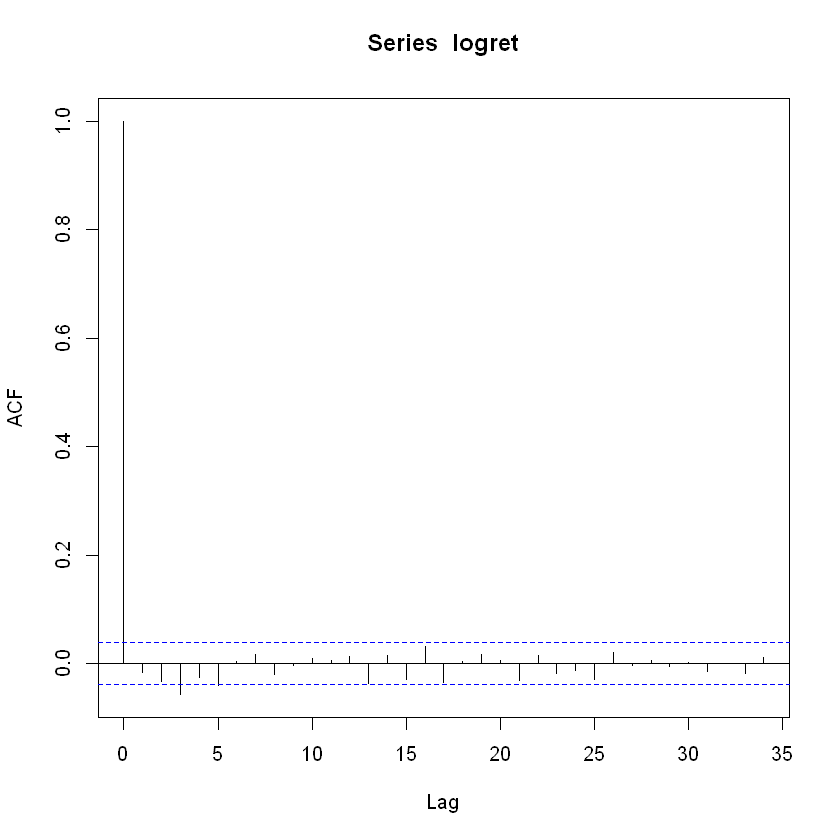

In [329]:
# Auto-correlation f(x) of logret
acf(logret) # dashed lines - 95% confidence band for the acf around 0 - As if it is outside the band - then there is significant
# Serial correlation

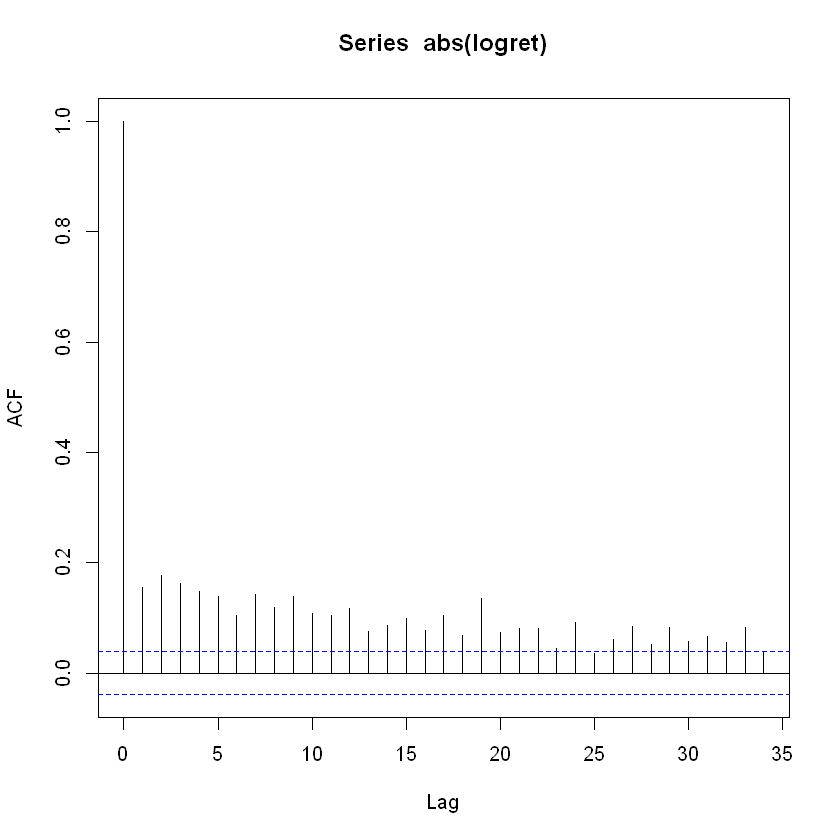

In [330]:
# Volatility Clustering
# ACF for NTC daily log-returns
acf(abs(logret)) # absolute value

In [331]:
#High serial correlations , so predictable #Testing for 2nd assumptions - above & Next below

#absolute - Large returns whether +ve /-ve = Tend to be followed by large returns- 
#This is what happens when data has clusters of volatility

#Daily index of MSCI-Devd has strong volatility clustering # Img of logreturns - therefore predictable

In [332]:
#Volatilility which is the standard deviation of log-returns
library(rugarch)

In [333]:
garch.N <- ugarchspec(variance.model = list(model = "sGARCH",garchOrder = c(1,1)),
                     mean.model = list(armaOrder = c(0,0),include.mean = TRUE),
                     distribution.model = "norm")
# saving the model as garch.N

In [334]:
fit.garch.N <- ugarchfit(spec = garch.N,data = logret)
fit.garch.N


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000605    0.000136   4.4563 0.000008
omega   0.000003    0.000001   2.9346 0.003340
alpha1  0.085118    0.007526  11.3092 0.000000
beta1   0.869402    0.008199 106.0337 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000605    0.000127   4.7734 0.000002
omega   0.000003    0.000004   0.7488 0.453980
alpha1  0.085118    0.026675   3.1909 0.001418
beta1   0.869402    0.021465  40.5032 0.000000

LogLikelihood : 8910.295 

Information Criteria
------------------------------------
                    
Akaike       -6.9689
Bayes        -6.9598
Shibata      -6.9689
Hannan-Quinn -6.9656

Weig

In [335]:
# save Fitted Values 
save1 <- cbind(logret,fit.garch.N@fit$sigma,fit.garch.N@fit$z)
names(save1) <- c("logret","s","z")
# we are adding 3 columns logret +  fitted values of sqr root of fitted values of ht
# + Fitted values of et

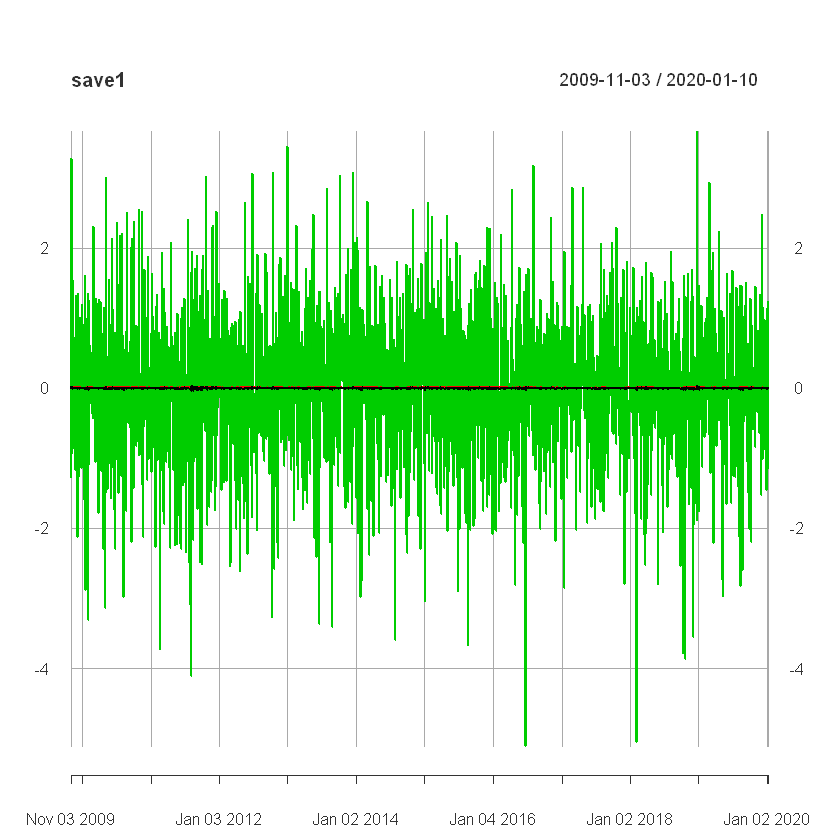

In [336]:
plot(save1)

In [337]:
head(save1)

                 logret           s           z
2009-11-03 -0.009525951 0.007925390 -1.27829574
2009-11-04  0.008170986 0.008128321  0.93081268
2009-11-05  0.000000000 0.008064624 -0.07502411
2009-11-06  0.025882601 0.007700659  3.28251911
2009-11-09  0.007460825 0.010424328  0.65767153
2009-11-10 -0.008783590 0.010059839 -0.93327848

In [338]:
#Diagnostic test for the neww fitted et
# Distribution of returns
# ESTIMATE U -using sample mean  and sigma using std. deviation

mu <- round(mean(save1$z),8)

sig <- round(sd(save1$z),8)

mu
sig

[1] -0.0298989

[1] 1.000941

In [339]:
rvec <- as.vector(save1$z) # Converting into vector
round(skewness(rvec),2) # So left-skewed

[1] -0.29

In [340]:
# If a distribution has fatter tails = Leptokurtic
# # If a distribution has Thinner tails = Platykurtic
rvec <- as.vector(save1$z)
round(kurtosis(rvec),2) #Heavy Tailed as it is > than 3 | Normal if = 3 |  < 3 - for thin tailed test

[1] 4.34

In [341]:
# Jarque Bera test for normality

rvec <- as.vector(save1$z)
jarque.test(rvec)  # i.e reject normality


	Jarque-Bera Normality Test

data:  rvec
JB = 227.16, p-value < 2.2e-16
alternative hypothesis: greater


In [342]:
#Now the expected values should have the following statistical properties
#Mean =0
#STD = 1
# Skewness=0
#Kurtosis = 3 # As per the GARCH model specifications 
# While in the previous moels the diagnostic test elements where actuallly better

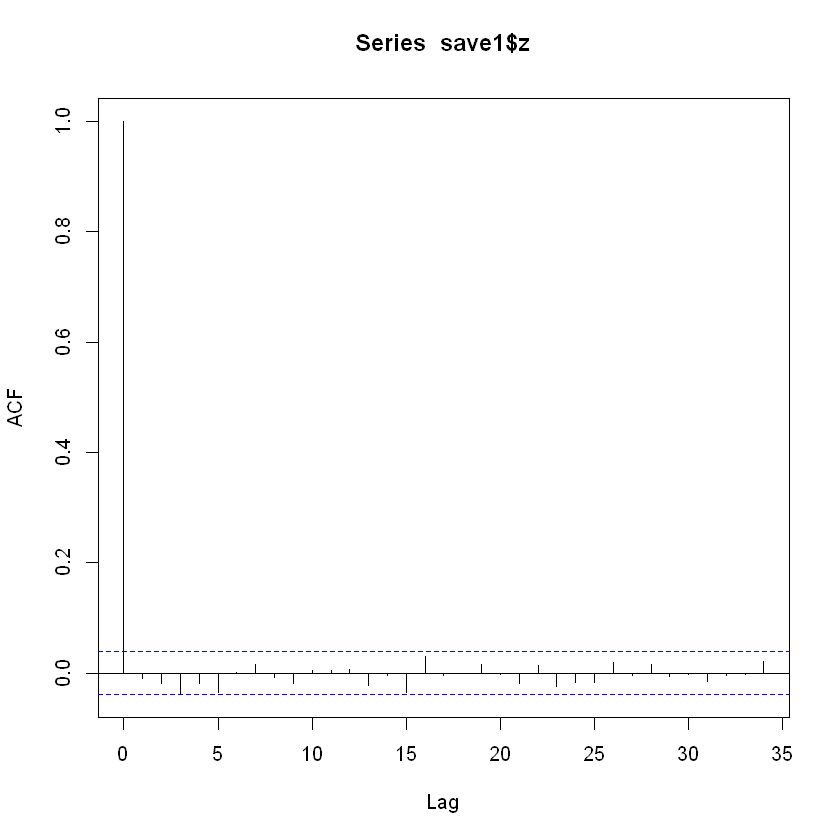

In [343]:
acf(save1$z)

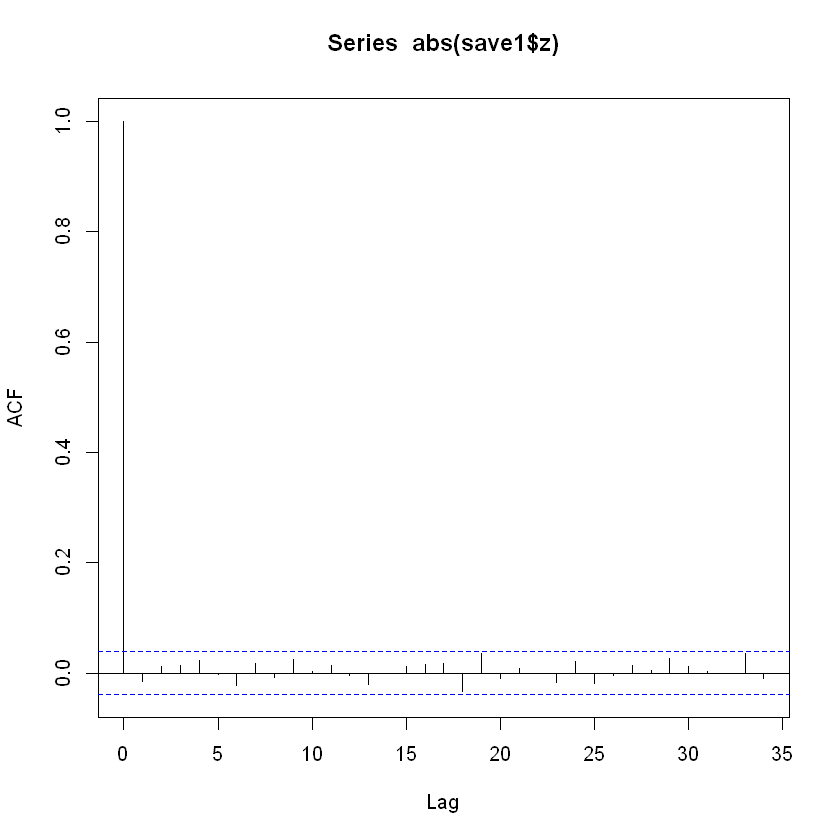

In [344]:
acf(abs(save1$z))

In [345]:
#Till Now we have done with a GARCH(1,1) model a normal-distribution
# Now with a GARCH(1,1) T-distribution

# saving the model as garch.N

In [346]:
#Till Now we have done with a GARCH(1,1) model a normal-distribution
# Now with a GARCH(1,1) T-distribution
garch.t <- ugarchspec(variance.model = list(model = "sGARCH",garchOrder = c(1,1)),
                     mean.model = list(armaOrder = c(0,0),include.mean = TRUE),
                     distribution.model = "std")

fit.garch.t <- ugarchfit(spec = garch.t,data = logret)

fit.garch.t

# saving the model as garch.t


*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: std 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000659    0.000129   5.0881 0.000000
omega   0.000002    0.000001   1.8666 0.061961
alpha1  0.081553    0.013827   5.8982 0.000000
beta1   0.882564    0.017447  50.5857 0.000000
shape   6.587340    0.843644   7.8082 0.000000

Robust Standard Errors:
        Estimate  Std. Error  t value Pr(>|t|)
mu      0.000659    0.000106  6.20771 0.000000
omega   0.000002    0.000005  0.46851 0.639423
alpha1  0.081553    0.032230  2.53034 0.011395
beta1   0.882564    0.055492 15.90445 0.000000
shape   6.587340    0.874503  7.53266 0.000000

LogLikelihood : 8958.969 

Information Criteria
------------------------------------
                 

In [347]:
# save Fitted Values
save2 <- cbind(logret,fit.garch.t@fit$sigma,fit.garch.t@fit$z)
names(save2) <- c("logret","s","z")

parm1 <- fit.garch.t@fit$coef

In [348]:
#Diagnostic test for the neww fitted et
# Distribution of returns
# ESTIMATE U -using sample mean  and sigma using std. deviation

mu <- round(mean(save2$z),8)

sig <- round(sd(save2$z),8)

mu
sig

[1] -0.03748299

[1] 0.9964215

In [349]:
rvec <- as.vector(save2$z) # Converting into vector
round(skewness(rvec),2) # So left-skewed

[1] -0.29

In [350]:
# If a distribution has fatter tails = Leptokurtic
# # If a distribution has Thinner tails = Platykurtic
rvec <- as.vector(save2$z)
round(kurtosis(rvec),2) #Heavy Tailed as it is > than 3 | Normal if = 3 |  < 3 - for thin tailed test

[1] 4.36

In [351]:
# Jarque Bera test for normality

rvec <- as.vector(save2$z)
jarque.test(rvec)  # i.e reject normality


	Jarque-Bera Normality Test

data:  rvec
JB = 234.8, p-value < 2.2e-16
alternative hypothesis: greater


In [352]:
#Now the expected values should have the following statistical properties
#Mean =0
#STD = 1
# Skewness=0
#Kurtosis = 3+6/v-4 # As per the GARCH model specifications 
# While in the previous moels the diagnostic test elements where actuallly better

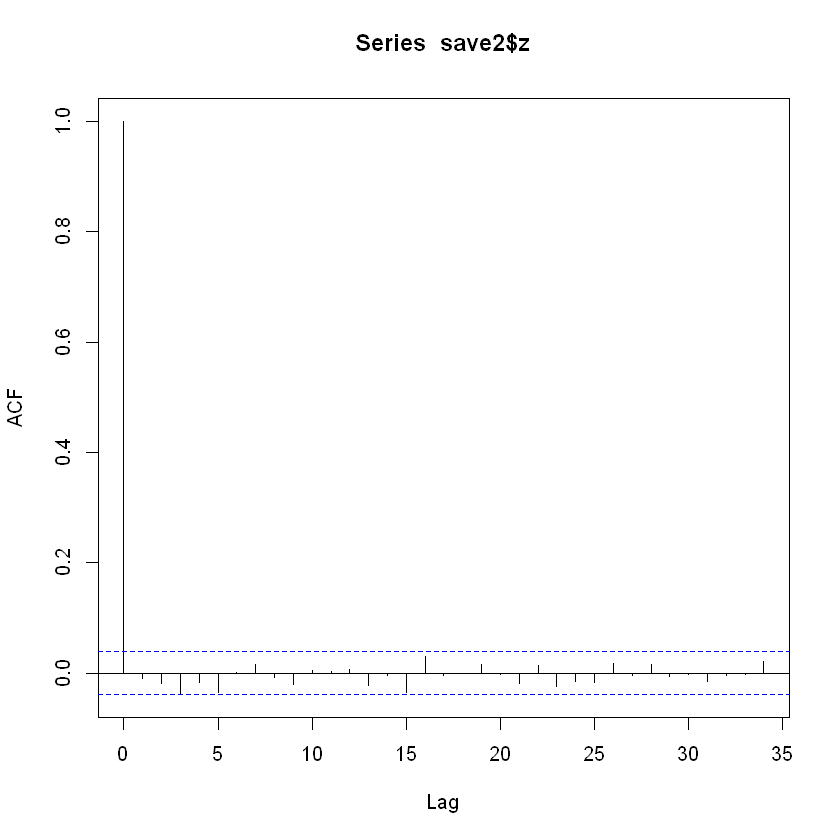

In [353]:
acf(save2$z)

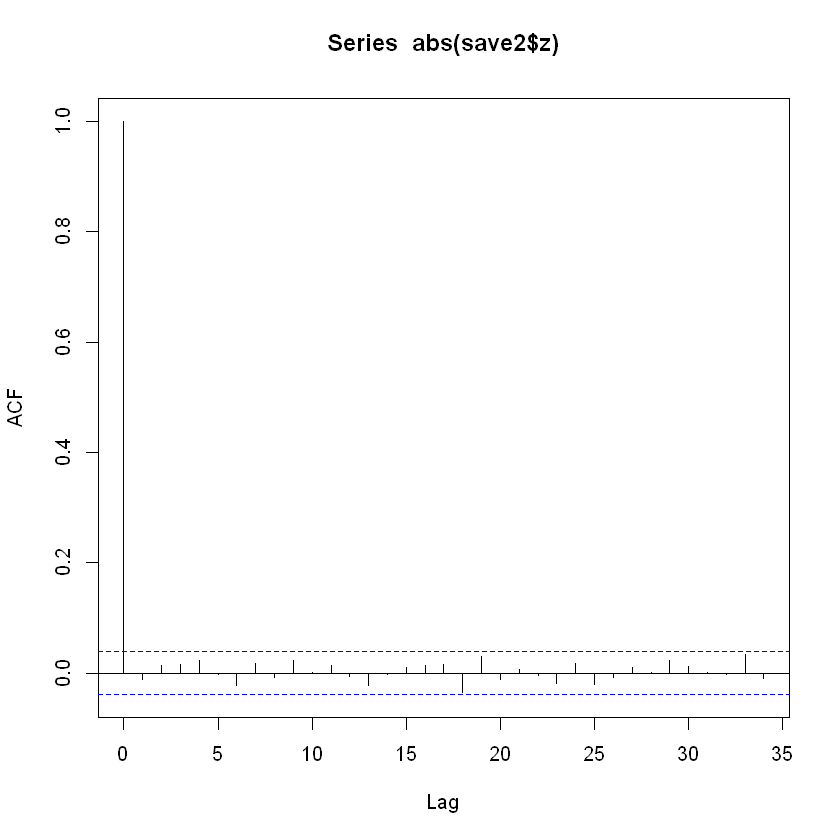

In [354]:
acf(abs(save2$z))

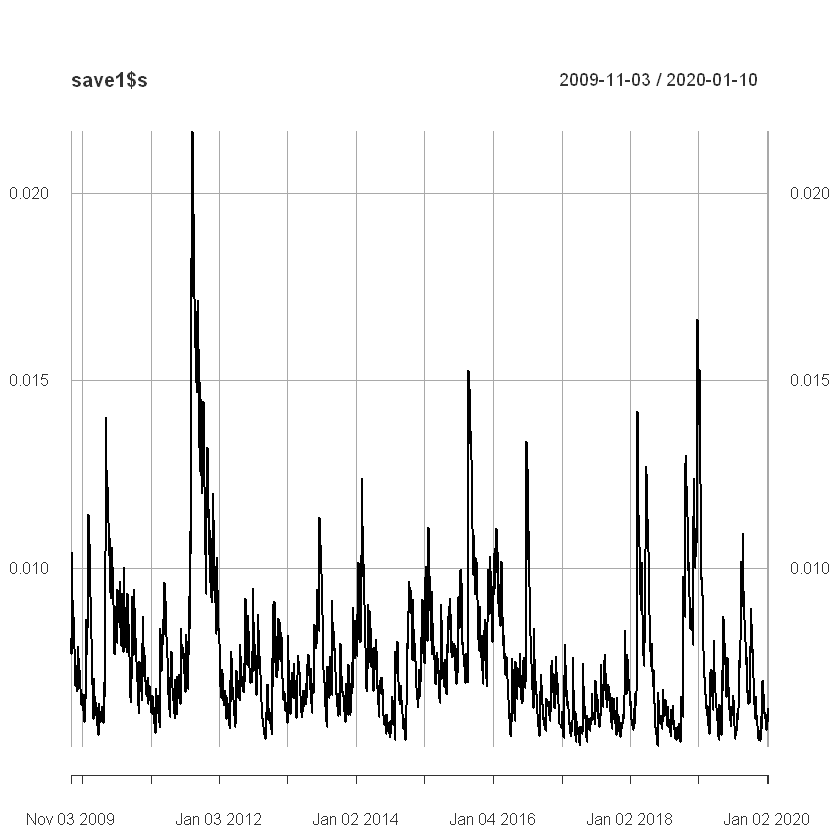

In [355]:
plot(save1$s)

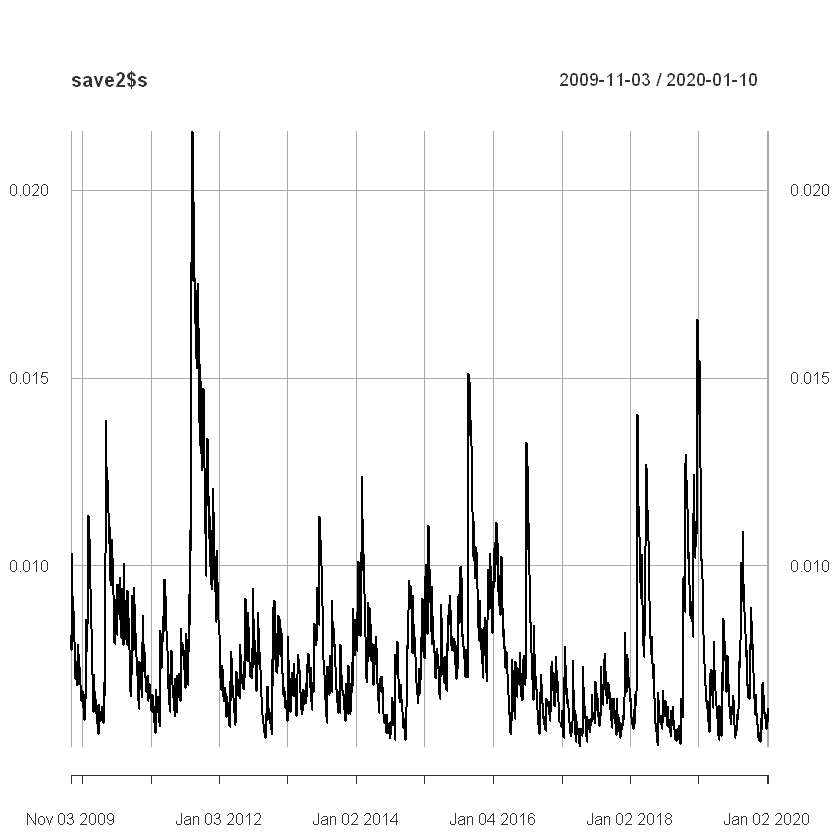

In [356]:
plot(save2$s)

In [357]:
#Graph of fiited sqr. root of ht in both cases - it denotes the volatility clustering in the Bitcoin Prices
# As the volatility is high VAR & ES are going to be High
# As the volatility is low VAR & ES are going to be Low
# So above VAR and ES are going to be high at aril 1,2020

In [358]:
#Now that we have estimated the GARCH model now we can now estimate it to Find VAR & ES using UGARCH boot function
# Simulate 1-day ahead with ugarchboot() fxn

#Simulate outcomes by bootstrapping from fited et of fit.garch.t
set.seed(123789)
boot.garch <- ugarchboot(fit.garch.t,
                        method="Partial",
                        sampling="raw",   #bootstrap fro fitted e
                        n.ahead=1,           #simulation horizon # How many periods to simulate - Me the next day
                        n.bootpred=100000,     #number of simulations
                        solver="solnp") #Save it at boot.garch

In [359]:
#Calculate the VAR and ES from the simulated outcomes


rvec <- boot.garch@fseries
alpha <- 0.05
VAR <- quantile(rvec,alpha)
ES <- mean(rvec[rvec<VAR])

VAR 
ES            # Prediction for 9-03-2021

5% 
-0.009636857

[1] -0.01350916

In [360]:
#Now that we have estimated the GARCH model now we can now estimate it to Find VAR & ES using UGARCH boot function
# Simulate 1-day ahead with ugarchboot() fxn

#Simulate outcomes by bootstrapping from fited et of fit.garch.t
set.seed(123789)
boot.garch1 <- ugarchboot(fit.garch.N,
                        method="Partial",
                        sampling="raw",   #bootstrap fro fitted e
                        n.ahead=1,           #simulation horizon # How many periods to simulate - Me the next day
                        n.bootpred=100000,     #number of simulations
                        solver="solnp") #Save it at boot.garch

In [361]:
#Calculate the VAR and ES from the simulated outcomes


rvec <- boot.garch1@fseries
alpha <- 0.05
VAR <- quantile(rvec,alpha)
ES <- mean(rvec[rvec<VAR])

VAR 
ES    

5% 
-0.009891253

[1] -0.01371854